통계 분석을 위한 라이브러리 로드

In [4]:
from scipy.stats import wilcoxon
import scipy.stats as stats

우선 설문값이 정규분포를 따르는지 확인 -> 정규분포를 따르지 않는 것으로 나타남

In [ ]:
# SA-10(16) 사전 점수 전체 리스트
data = [
    4.4, 2.0, 3.6, 4.4, 2.4, 1.8, 5.0, 3.8, 3.8, 4.2, 2.4, 1.6,
    4.2, 4.0, 3.2, 4.4, 2.8, 3.6, 1.8, 2.4, 4.2, 2.2, 4.4, 2.2
]

# Shapiro-Wilk 정규성 검정 수행
stat, p_value = stats.shapiro(data)

print("Shapiro-Wilk 통계량:", stat)
print("p-value:", p_value)

alpha = 0.05
if p_value > alpha: print("정규성 만족 (p > 0.05)")
else: print("정규성 만족 X")

Shapiro-Wilk 통계량: 0.9073286151510239
p-value: 0.03087626578590826
정규성 만족 X


정규분포를 따르지 않기 때문에 t-test의 대체로 비모수 검정 수행(Wilcoxon)
사전 보안 태도가 '높음'으로 분류되었던 그룹 (중앙값 기준)에서는 유의미한 향상이 확인되지 않았음

In [ ]:
# SA-10(16) '높음' 그룹
post_scores = [
    4.6, 3.0, 4.4, 5.0, 5.0, 3.6, 3.6,
    3.8, 4.4, 4.6, 4.6, 4.2, 3.4
]
pre_scores = [
    4.4, 3.6, 4.4, 5.0, 3.8, 3.8, 4.2,
    4.2, 4.0, 4.4, 3.6, 4.2, 4.4
]

# Wilcoxon Signed-Rank Test 수행 (사후 > 사전)
statistic, p_value = wilcoxon(post_scores, pre_scores, alternative='greater')

# 결과 출력
print("Wilcoxon 통계량 (W):", statistic)
print("p-value:", p_value)

# 유의 수준 5% 가정
alpha = 0.05 
if p_value < alpha: print("통계적으로 유의미한 향상 확인 (p < 0.05)")
else: print("통계적으로 유의미한 향상 확인되지 않음")


Wilcoxon 통계량 (W): 25.5
p-value: 0.5859375
통계적으로 유의미한 향상 확인되지 않음


'낮음'으로 분류되었던 그룹에서는 유의미한 향상이 확인됨

In [ ]:
# 사전 문항에서 중앙값을 기준으로 '높음'과 '낮음'으로 집단 분류 -> 낮은 집단에서 유의미성 확인
post_scores = [4.2, 3.4, 5.0, 4.2, 4.4, 3.8, 3.4, 4.8, 4.4, 4.8, 3.8]
pre_scores = [2.0, 2.4, 1.8, 2.4, 1.6, 3.2, 2.8, 1.8, 2.4, 2.2, 2.2]

# Wilcoxon 부호 순위 검정 수행 (사후 점수가 사전보다 크다는 방향성 가정)
statistic, p_value = wilcoxon(post_scores, pre_scores, alternative='greater')

print("Wilcoxon 통계량 (W):", statistic)
print("p-value:", p_value)

# 유의 수준 5% 가정
alpha = 0.05 
if p_value < alpha: print("통계적으로 유의미한 향상 확인 (p < 0.05)")
else: print("통계적으로 유의미한 향상 확인되지 않음")

Wilcoxon 통계량 (W): 66.0
p-value: 0.00048828125
통계적으로 유의미한 향상 확인 (p < 0.05)


SA-10(16) 문항을 기준으로 두 그룹 간의 HAIS-Q 점수 비교: Mann–Whitney U 검정
라이브러리 불러오기

In [9]:
from scipy.stats import mannwhitneyu

In [ ]:
# SA-10(16) '낮음' 그룹의 HAIS-Q 점수
haisq_low = [
    4.0, 3.75, 4.375, 3.625, 4.125,
    3.5, 4.25, 4.25, 5.0, 4.625, 4.125
]
# SA-10(16) '높음' 그룹의 HAIS-Q 점수
haisq_high = [
    4.25, 3.625, 4.25, 4.0, 3.875,
    4.125, 3.625, 4.25, 4.0, 4.125,
    4.875, 4.875, 4.625
]

# Mann–Whitney U 검정 (양측 검정)
statistic, p_value = mannwhitneyu(haisq_high, haisq_low, alternative='two-sided')

print("Mann–Whitney U 통계량:", statistic)
print("p-value:", p_value)

# 해석 조건
alpha = 0.05
if p_value < alpha: print("SA-13 '높음', '낮음' 그룹 사이에서 HAIS-Q 점수에 차이가 나타남 (p < 0.05)")
else: print("SA-10(16) '높음', '낮음' 그룹 사이에서 HAIS-Q 점수에 차이가 나타나지 않음 (p < 0.05)")

Mann–Whitney U 통계량: 73.5
p-value: 0.9301385550286396
SA-10(16) '높음', '낮음' 그룹 사이에서 HAIS-Q 점수에 차이가 나타나지 않음 (p < 0.05)


SA-10(16) 회고형 사전 점수를 기준으로 분류한 보안 태도 '높음' 집단과 '낮음' 집단은, 교육 전 보안 인식 수준에서 차이를 보였으나, 
실습 이후 측정한 HAIS-Q 총합 점수에서는 통계적으로 유의미한 차이를 보이지 않는 것으로 확인됨
(Mann–Whitney U = 73.5, p = 0.930)

SA-10(16) '낮음' 그룹에서 실제로 SA-16(10) 점수가 유의미하게 향상된 것을 바탕으로,
이들이 자기 인식 평가 항목에서도 스스로 변화했다고 인식했는지 확인 
Spearman 상관관계 분석을 통해 실제 변화량과 자기 평가 간의 긍정적 상관관계 파악을 목적으로 함

In [11]:
from scipy.stats import spearmanr

In [12]:
sa16_change = [
    2.2, 1, 3.2, 1.8, 2.8,
    0.6, 0.6, 3, 2, 2.6, 1.6
]  
self_assessment = [
    5, 4, 5, 4.25, 5, 4.5, 4, 4.5, 5, 4.75, 4.25
]

# Spearman 상관계수 계산
corr, p_value = spearmanr(sa16_change, self_assessment)

print("Spearman 상관계수:", corr)
print("p-value:", p_value)

# 해석
if p_value < 0.05:
    print("실제 SA-16(10) 척도 변화량과 자기 인식 평가 간 유의미한 상관관계 확인됨")
else: print("실제 SA-16(10) 척도 변화량과 자기 인식 평가 간 유의미한 상관관계 확인되지 않음")

Spearman 상관계수: 0.704504917567163
p-value: 0.015498721927380563
실제 SA-16(10) 척도 변화량과 자기 인식 평가 간 유의미한 상관관계 확인됨


양의 상관관계 (r = 0.705) 확인됨
: 실제 SA-16 변화점수가 클수록, 스스로 “변화했다고 인식”하는 경향도 강함
즉, SA-10(16) '낮음' 그룹의 사람들은 실제 행동 변화(SA-16 점수 증가)와 자기 인식 평가(스스로 변했다고 느낀 정도) 사이에 높은 정합성을 보임

그래프로 시각화

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from matplotlib import cm
import numpy as np

plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows
plt.rcParams['axes.unicode_minus'] = False

기초 통계 요약:
count    24.000000
mean      0.900000
std       1.239916
min      -1.000000
25%       0.000000
50%       0.600000
75%       1.850000
max       3.200000
Name: SA-16 향상폭, dtype: float64


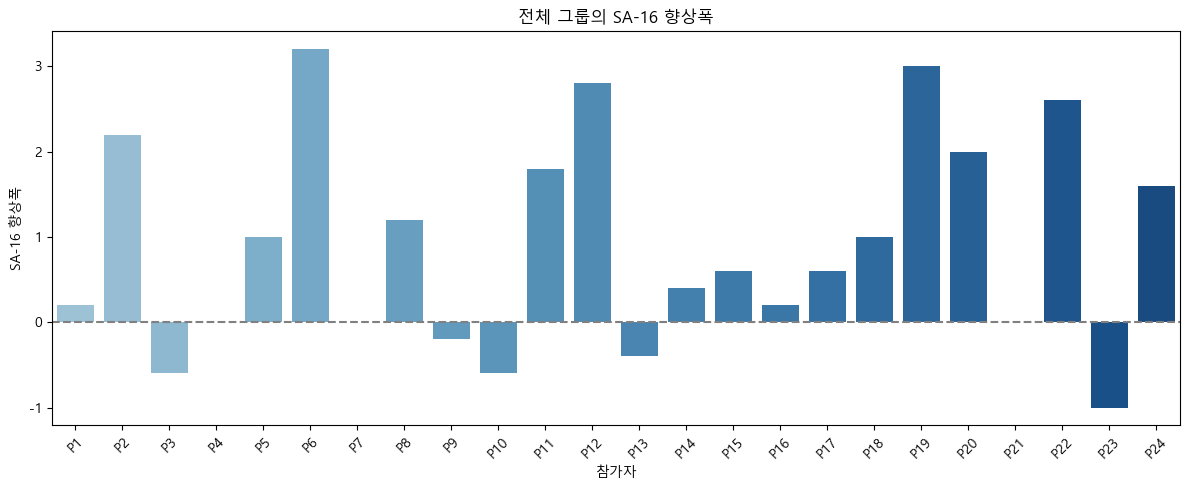

In [29]:
sa16_all = [
    0.2, 2.2, -0.6, 0, 1, 3.2, 0, 1.2, -0.2, -0.6, 1.8, 2.8,
    -0.4, 0.4, 0.6, 0.2, 0.6, 1, 3, 2, 0, 2.6, -1, 1.6
]
df = pd.DataFrame({'참가자': [f'P{i+1}' for i in range(len(sa16_all))],
                   'SA-16 향상폭': sa16_all})

pastel_palette = sns.color_palette("pastel")
colors = cm.Blues(np.linspace(0.4, 0.9, len(df))).tolist()
# 평균/중앙값 등 통계 출력
print("기초 통계 요약:")
print(df['SA-16 향상폭'].describe())

# 그래프 그리기
plt.figure(figsize=(12, 5))
sns.barplot(
    x='참가자',
    y='SA-16 향상폭',
    data=df,
    hue='참가자',        
    dodge=False,        
    legend=False,      
    palette=colors
)

plt.axhline(0, color='gray', linestyle='--')
plt.title('전체 그룹의 SA-16 향상폭')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

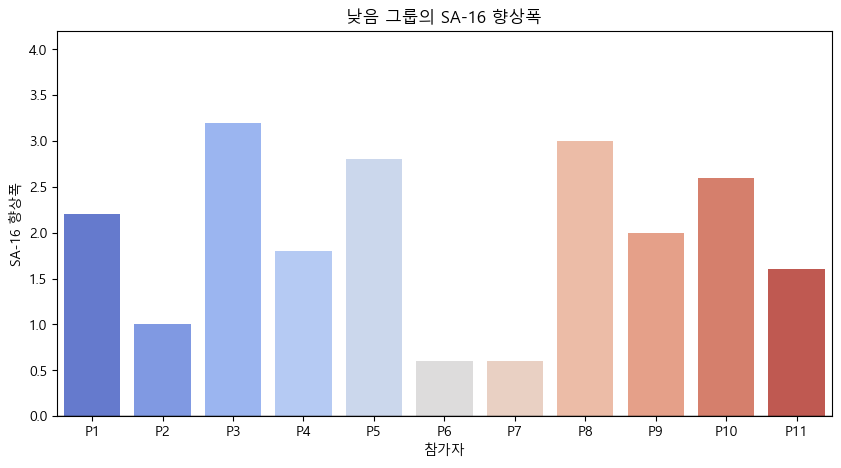

In [30]:
sa16_change = [2.2, 1, 3.2, 1.8, 2.8, 0.6, 0.6, 3, 2, 2.6, 1.6]

# 시리즈로 변환
df = pd.DataFrame({'참가자': [f'P{i+1}' for i in range(len(sa16_change))],
                   'SA-16 향상폭': sa16_change})

# 그래프 그리기
plt.figure(figsize=(10, 5))
sns.barplot(x='참가자', y='SA-16 향상폭', data=df, hue='참가자', palette='coolwarm', dodge=False, legend=False)
plt.title('낮음 그룹의 SA-16 향상폭')
plt.ylim(0, max(sa16_change) + 1)
plt.axhline(y=0, color='black', linewidth=1)
plt.show()

SA-16 향상폭과 자기 인식 평가 관계 (산점도 + 회귀선)

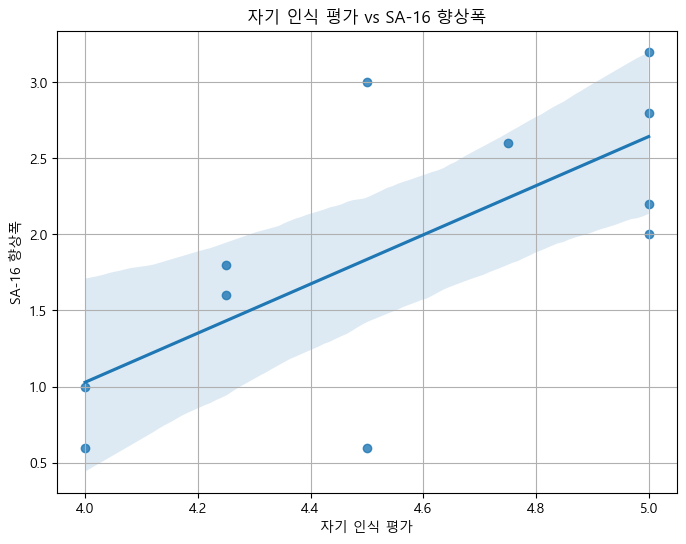

In [31]:
self_eval = [5, 4, 5, 4.25, 5, 4.5, 4, 4.5, 5, 4.75, 4.25]

df_corr = pd.DataFrame({
    '자기 인식 평가': self_eval,
    'SA-16 향상폭': sa16_change
})

# 산점도 + 회귀선
plt.figure(figsize=(8, 6))
sns.regplot(x='자기 인식 평가', y='SA-16 향상폭', data=df_corr, ci=95)
plt.title('자기 인식 평가 vs SA-16 향상폭')
plt.grid(True)
plt.show()